<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
customers = pd.read_csv('../data/Wholesale customers data.csv')

In [4]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [25]:
customers.shape

(440, 8)

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [5]:
# Your code here:
customers.columns   # se observan las columnas

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
customers.Channel.unique()

array([2, 1], dtype=int64)

In [7]:
customers.Region.unique()

array([3, 1, 2], dtype=int64)

In [12]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [22]:
customers.isna().any()

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

In [23]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


**Your observations here**

+ No hay datos categoricos
+ Existe una correlacion alta entre Grocery y Detergents_paper
+ No hay nulos
+ Las columnas Channel y Region tienen 2 y 3 valores unicos
+ Se ven algunos outliers para cada columna



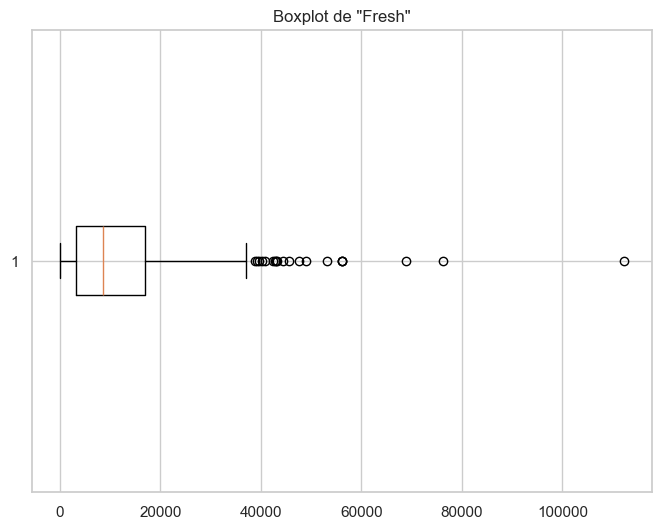

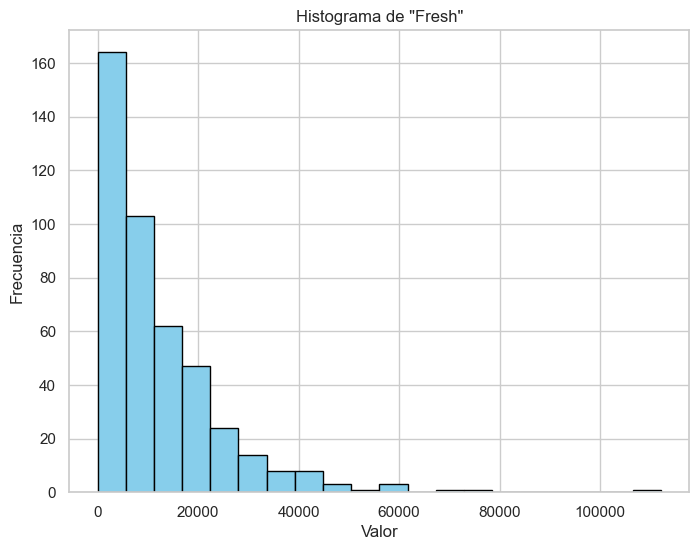

In [38]:
#You code here
# Gráfico de Caja 
plt.figure(figsize=(8, 6))
plt.boxplot(customers['Fresh'], vert=False)
plt.title('Boxplot de "Fresh"')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(customers['Fresh'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de "Fresh"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

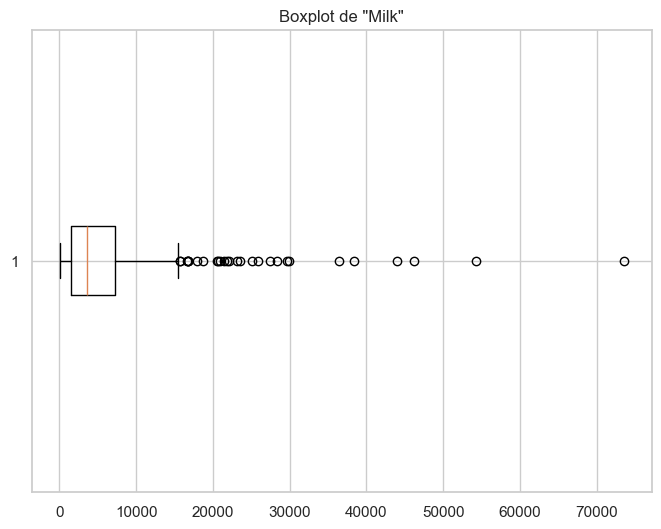

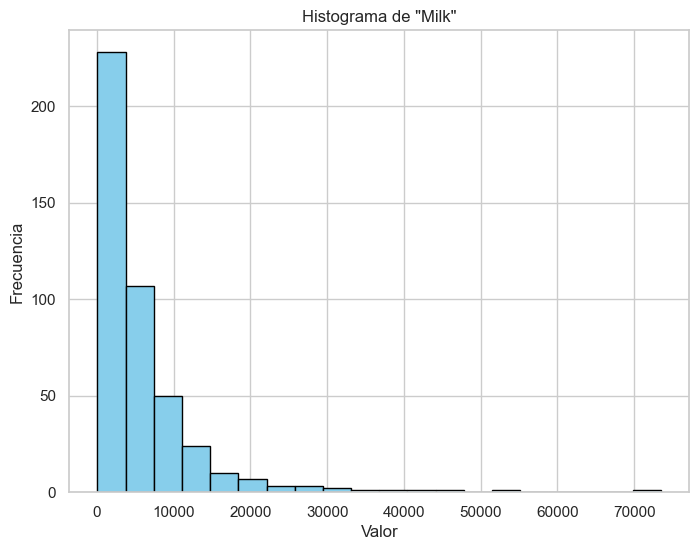

In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot(customers['Milk'], vert=False)
plt.title('Boxplot de "Milk"')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(customers['Milk'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de "Milk"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

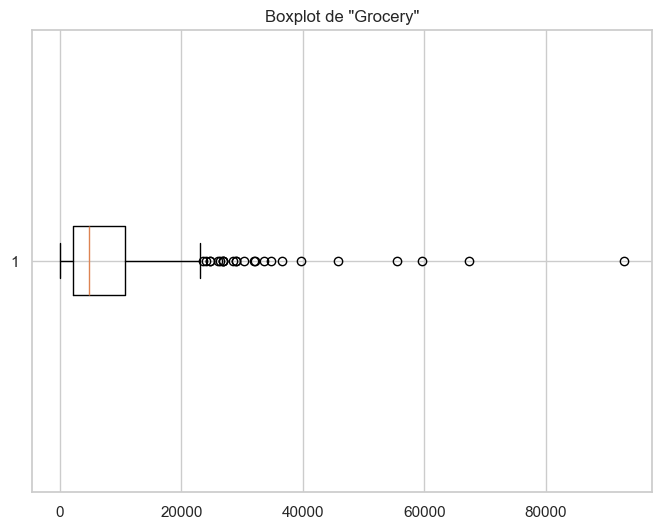

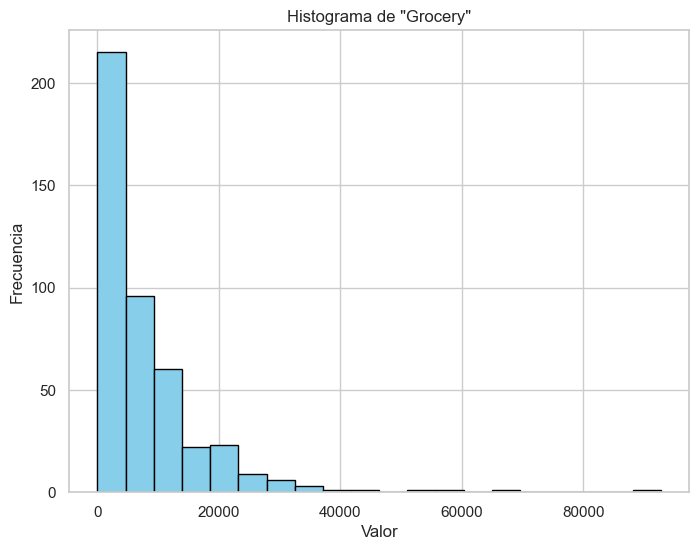

In [44]:
#You code here
plt.figure(figsize=(8, 6))
plt.boxplot(customers['Grocery'], vert=False)
plt.title('Boxplot de "Grocery"')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(customers['Grocery'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de "Grocery"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()



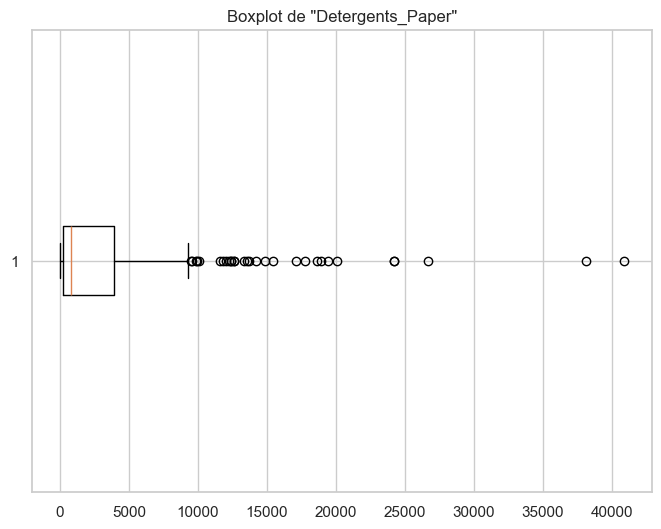

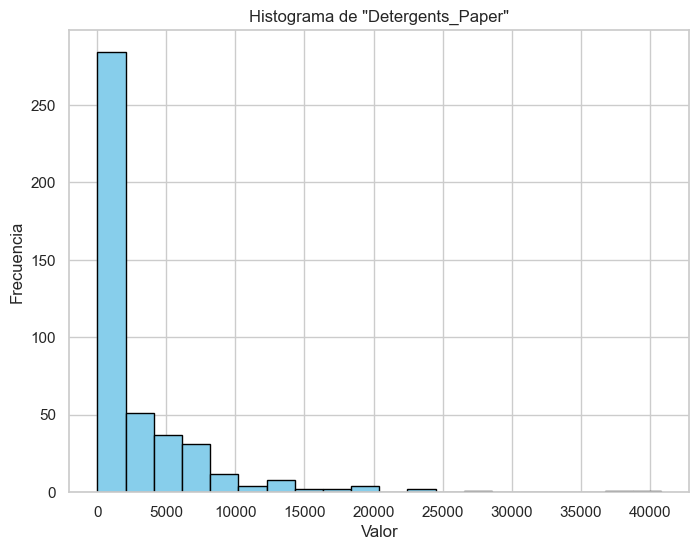

In [43]:
#You code here
plt.figure(figsize=(8, 6))
plt.boxplot(customers['Detergents_Paper'], vert=False)
plt.title('Boxplot de "Detergents_Paper"')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(customers['Detergents_Paper'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de "Detergents_Paper"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

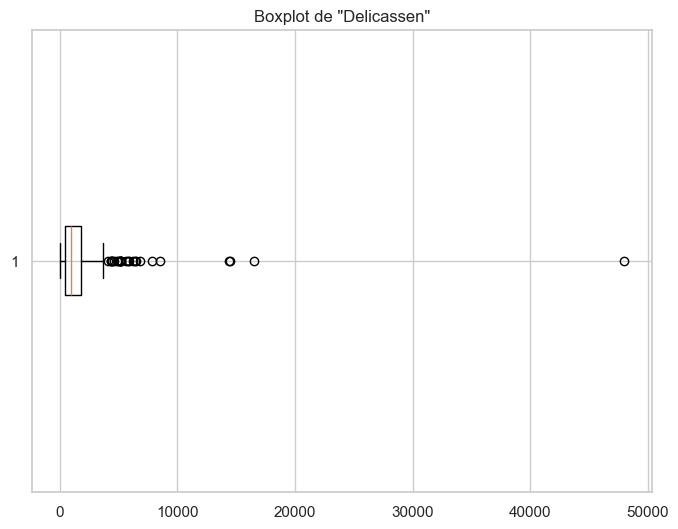

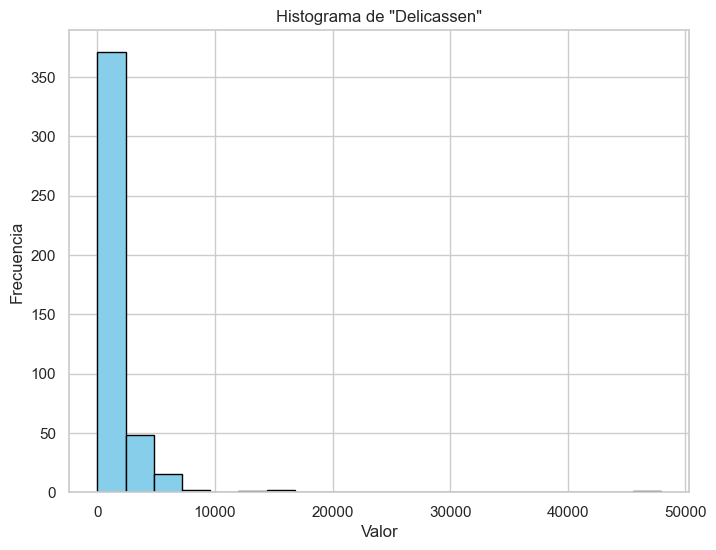

In [42]:
#You code here
plt.figure(figsize=(8, 6))
plt.boxplot(customers['Delicassen'], vert=False)
plt.title('Boxplot de "Delicassen"')
plt.show()		

plt.figure(figsize=(8, 6))
plt.hist(customers['Delicassen'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de "Delicassen"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

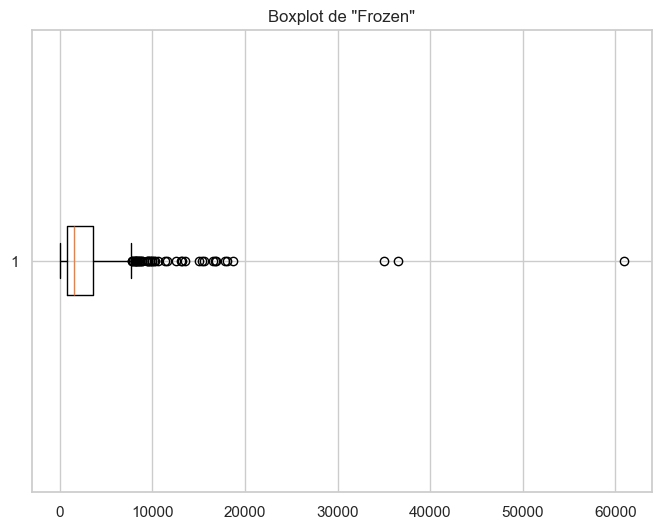

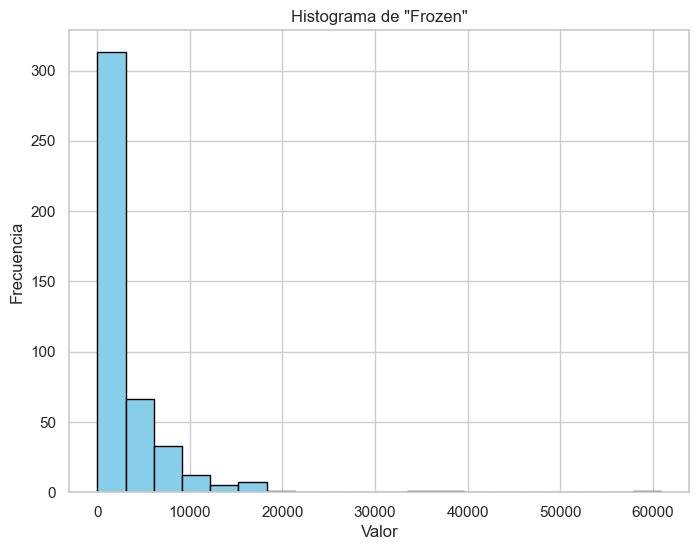

In [41]:
#You code here

plt.figure(figsize=(8, 6))
plt.boxplot(customers['Frozen'], vert=False)
plt.title('Boxplot de "Frozen"')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(customers['Frozen'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de "Frozen"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [96]:
# Your code here
Q1_frozen = customers['Frozen'].quantile(0.25)
Q3_frozen = customers['Frozen'].quantile(0.75)
IQR_frozen = Q3_frozen - Q1_frozen

upper_limit_frozen = Q3_frozen + 4 * IQR_frozen
upper_limit_frozen

14802.25

In [121]:
Q1_Delicassen = customers['Delicassen'].quantile(0.25)
Q3_Delicassen = customers['Delicassen'].quantile(0.75)
IQR_Delicassen = Q3_Delicassen - Q1_Delicassen

upper_limit_Delicassen = Q3_Delicassen + 3 * IQR_Delicassen
upper_limit_Delicassen

6056.25

In [92]:
Q1_Detergents_Paper = customers['Detergents_Paper'].quantile(0.25)
Q3_Detergents_Paper = customers['Detergents_Paper'].quantile(0.75)
IQR_Detergents_Paper = Q3_Detergents_Paper - Q1_Detergents_Paper

upper_limit_Detergents_Paper = Q3_Detergents_Paper + 3 * IQR_Detergents_Paper
upper_limit_Detergents_Paper

14917.75

In [106]:
Q1_Grocery = customers['Grocery'].quantile(0.25)
Q3_Grocery = customers['Grocery'].quantile(0.75)
IQR_Grocery = Q3_Grocery - Q1_Grocery

upper_limit_Grocery = Q3_Grocery + 2.5 * IQR_Grocery
upper_limit_Grocery

31912.625

In [117]:
Q1_Milk = customers['Milk'].quantile(0.25)
Q3_Milk = customers['Milk'].quantile(0.75)
IQR_Milk = Q3_Milk - Q1_Milk

upper_limit_Milk = Q3_Milk + 2.5 * IQR_Milk
upper_limit_Milk

21333.375

In [74]:
Q1_Fresh = customers['Fresh'].quantile(0.25)
Q3_Fresh = customers['Fresh'].quantile(0.75)
IQR_Fresh = Q3_Fresh - Q1_Fresh

upper_limit_Fresh = Q3_Fresh + 2.5 * IQR_Fresh
upper_limit_Fresh

51448.75

In [122]:
customers_without_outliers = customers[(customers['Fresh']<= upper_limit_Fresh)&(customers['Milk']<= upper_limit_Milk)&(customers['Grocery']<= upper_limit_Grocery)&(customers['Detergents_Paper']<= upper_limit_Detergents_Paper)&(customers['Delicassen']<= upper_limit_Delicassen)&(customers['Frozen']<= upper_limit_frozen)]

In [123]:
customers_without_outliers.shape

(398, 8)

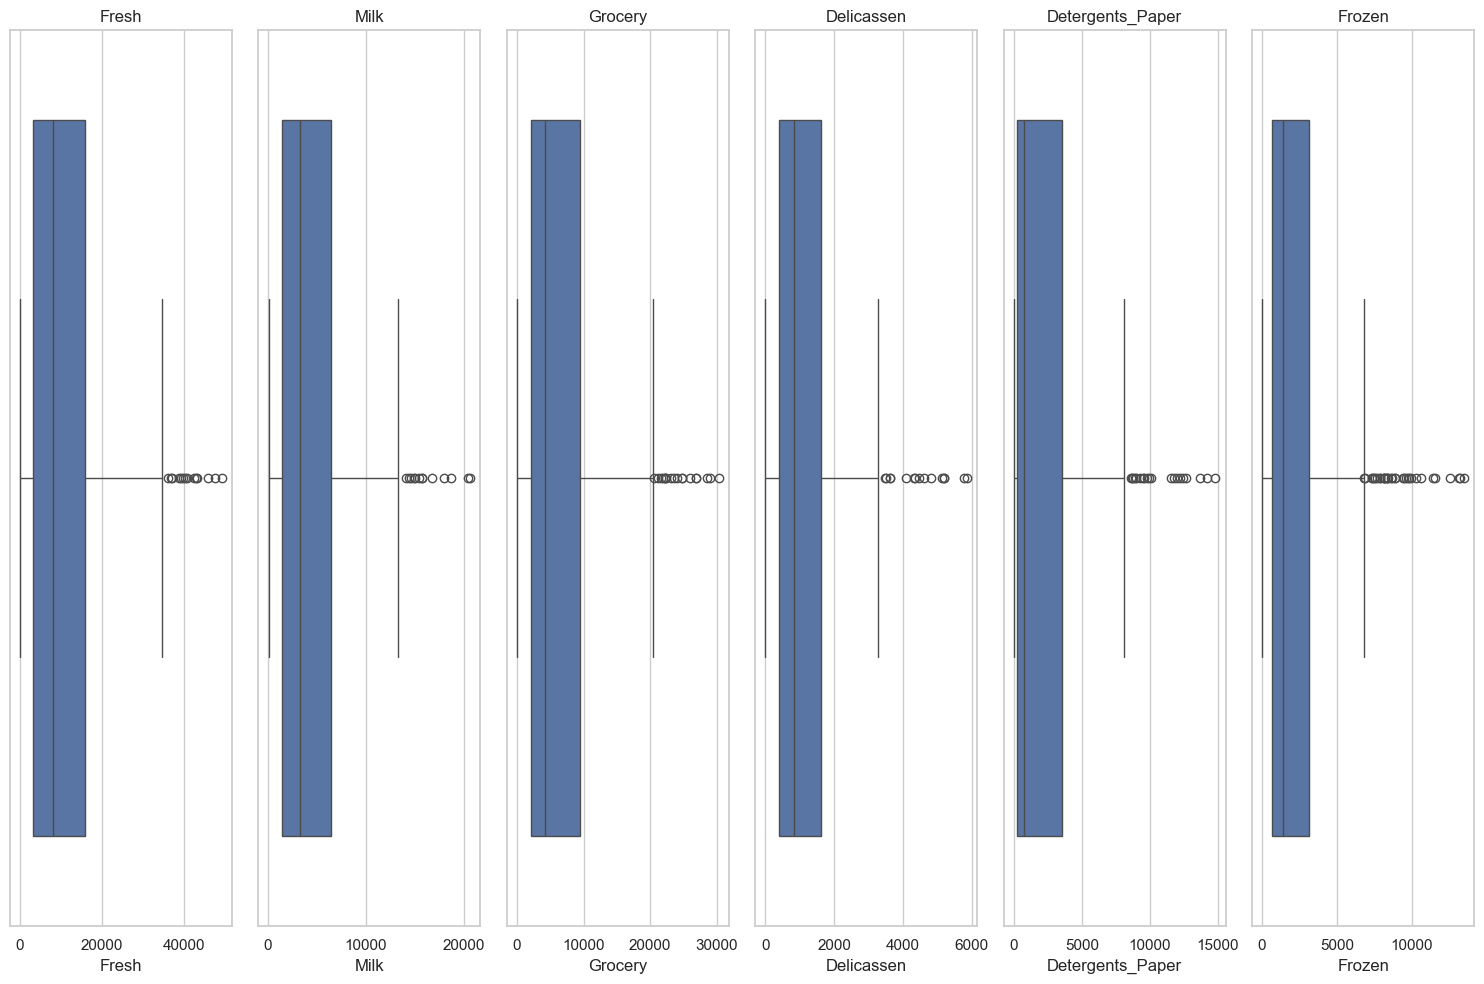

In [124]:
columnas = ['Fresh', 'Milk', 'Grocery', 'Delicassen', 'Detergents_Paper', 'Frozen']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columnas):
    plt.subplot(1, 6, i+1) 
    sns.boxplot(x=customers_without_outliers[column])
    plt.title(column)

plt.tight_layout()
plt.show()

**Your comment here**

+ Se establece un limite para cada columna para dejar los outliers fuera
+ 
+ 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [127]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customers_without_outliers)

customer_scale = pd.DataFrame(scaled_data, columns=customers_without_outliers.columns)



In [128]:
customer_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.513029,0.582783,0.192466,1.293246,0.179878,-0.841898,0.154119,0.173984
1,1.513029,0.582783,-0.378396,1.332235,0.511206,-0.250388,0.365227,0.593987
2,-0.660926,0.582783,0.253093,-0.848615,-0.371510,1.523381,-0.584930,0.605494
3,1.513029,0.582783,1.204191,0.218265,0.119952,0.572301,-0.151800,3.862912
4,1.513029,0.582783,-0.138739,0.939561,-0.222107,-0.669183,-0.145661,0.282341


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [136]:
from sklearn.cluster import KMeans

# Your code here:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)



c:\Users\ferna\Desktop\IRONHACK\7.3-lab_regression_analysis\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [137]:
cluster_labels = kmeans.labels_
customers_without_outliers['labels'] = cluster_labels


Count the values in `labels`.

In [138]:
# Your code here:
customers_without_outliers['labels'].value_counts()

labels
3    148
1    113
2     70
0     67
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [140]:
# Your code here
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5)
customers_without_outliers['labels_DBSCAN'] = dbscan.fit_predict(scaled_data)


Count the values in `labels_DBSCAN`.

In [142]:
# Your code here
customers_without_outliers['labels_DBSCAN'].value_counts()

labels_DBSCAN
-1    332
 0     58
 2      4
 1      4
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

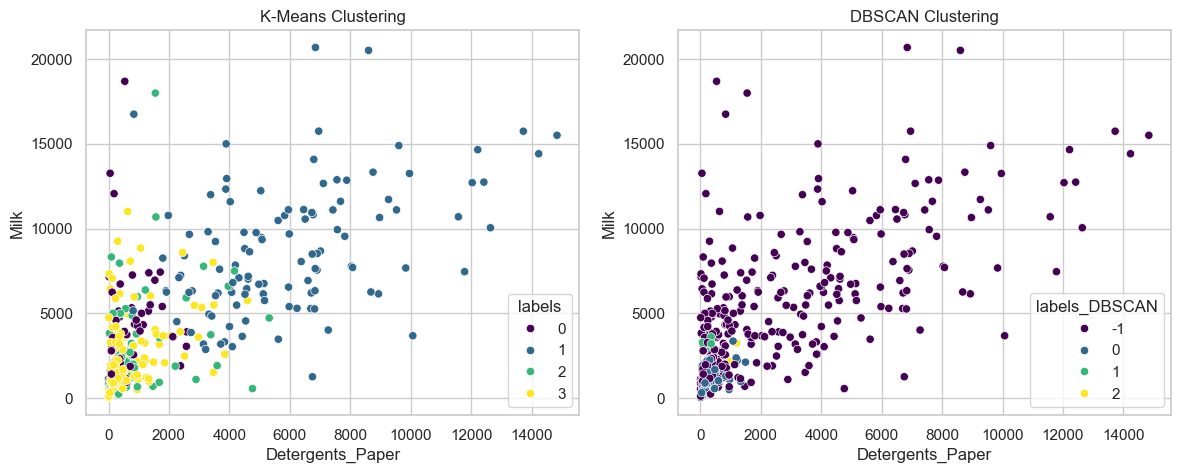

In [144]:
# Your code here:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.scatterplot(data=customers_without_outliers, x='Detergents_Paper', y='Milk', hue='labels', palette='viridis', ax=axes[0])
axes[0].set_title('K-Means Clustering')

sns.scatterplot(data=customers_without_outliers, x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', palette='viridis', ax=axes[1])
axes[1].set_title('DBSCAN Clustering')

plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

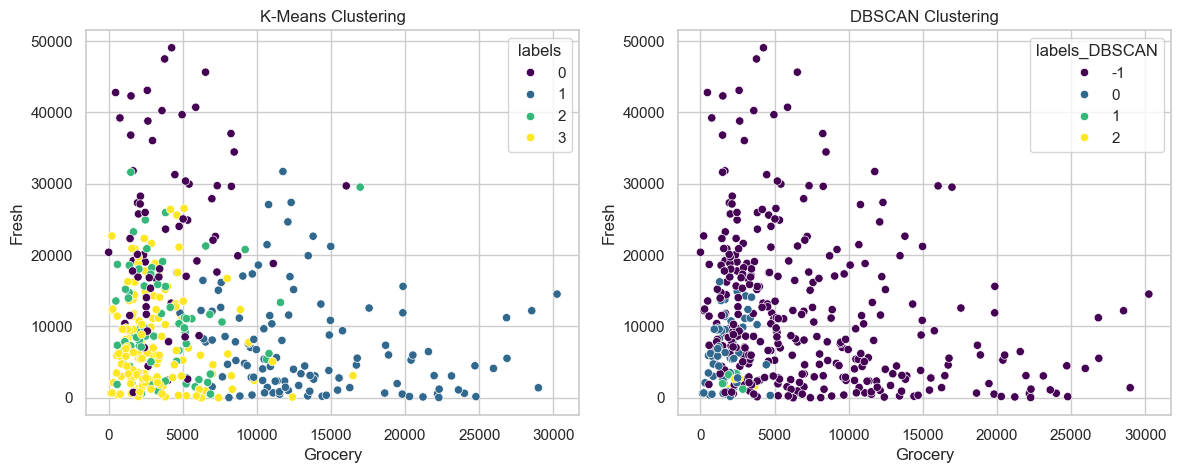

In [145]:
# Your code here:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.scatterplot(data=customers_without_outliers, x='Grocery', y='Fresh', hue='labels', palette='viridis', ax=axes[0])
axes[0].set_title('K-Means Clustering')

sns.scatterplot(data=customers_without_outliers, x='Grocery', y='Fresh', hue='labels_DBSCAN', palette='viridis', ax=axes[1])
axes[1].set_title('DBSCAN Clustering')

plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

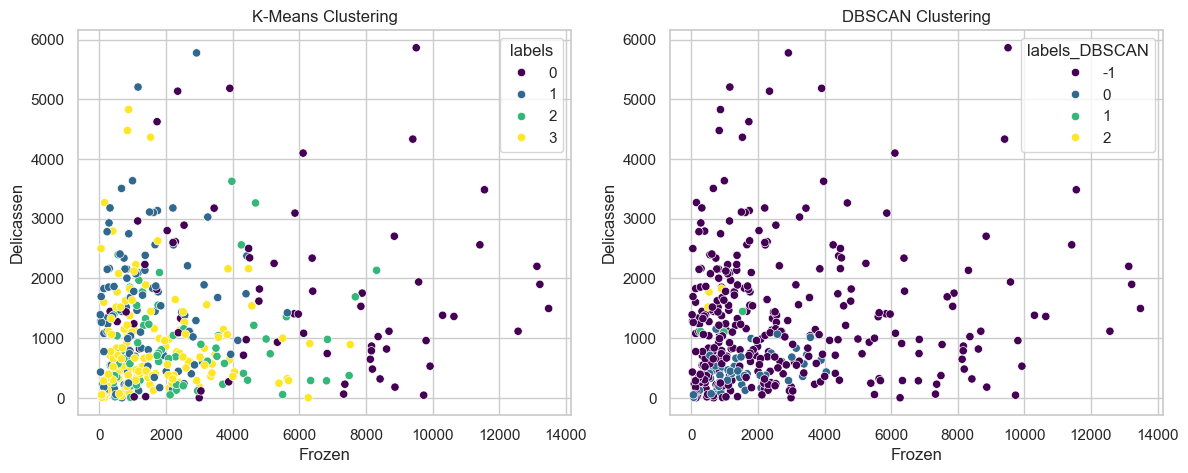

In [146]:
# Your code here:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.scatterplot(data=customers_without_outliers, x='Frozen', y='Delicassen', hue='labels', palette='viridis', ax=axes[0])
axes[0].set_title('K-Means Clustering')

sns.scatterplot(data=customers_without_outliers, x='Frozen', y='Delicassen', hue='labels_DBSCAN', palette='viridis', ax=axes[1])
axes[1].set_title('DBSCAN Clustering')

plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [147]:
# Your code here:
kmeans_means = customers_without_outliers.groupby('labels').mean()

dbscan_means = customers_without_outliers.groupby('labels_DBSCAN').mean()

kmeans_means, dbscan_means

(         Channel    Region         Fresh         Milk       Grocery  \
 labels                                                                
 0       1.074627  2.820896  23706.417910  3775.104478   4076.492537   
 1       1.964602  2.681416   7339.699115  8675.663717  13862.017699   
 2       1.071429  1.214286  10446.928571  2902.957143   3806.100000   
 3       1.013514  2.966216   7704.121622  2524.128378   3173.358108   
 
              Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
 labels                                                             
 0       6006.850746        666.402985  1731.597015      -1.000000  
 1       1282.831858       5971.017699  1379.867257      -1.000000  
 2       2545.328571        937.542857   899.600000      -1.000000  
 3       1597.851351        671.581081   847.277027      -0.472973  ,
                 Channel    Region         Fresh         Milk      Grocery  \
 labels_DBSCAN                                                           

Which algorithm appears to perform better?

**Your observations here**

 Me cuesta un poco ver cual de los dos modelos clusteriza mejor a traves de sus medias. Si fuera por los graficos diria que kmeans funciona mejor, aunque si fuera por la diferencia de medias podria ser DBSCAN. Para mi ninguno de los dos esta haciendo buenos clusters. 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [148]:
# Your code here

kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_
customers_without_outliers['labels'] = cluster_labels
customers_without_outliers['labels'].value_counts()

c:\Users\ferna\Desktop\IRONHACK\7.3-lab_regression_analysis\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


labels
0    282
1    116
Name: count, dtype: int64

Text(0.5, 1.0, 'K-Means Clustering')

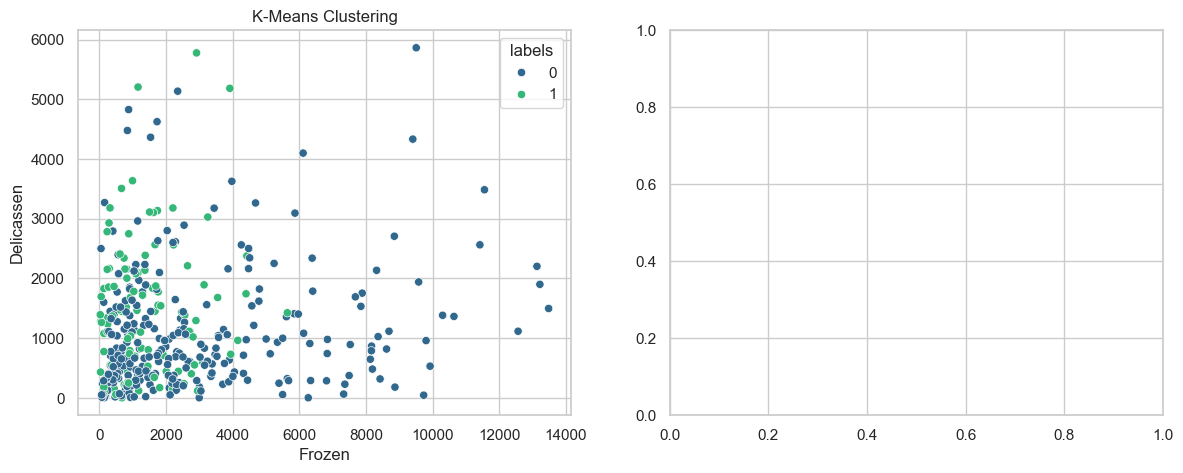

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.scatterplot(data=customers_without_outliers, x='Frozen', y='Delicassen', hue='labels', palette='viridis', ax=axes[0])
axes[0].set_title('K-Means Clustering')

**Your comment here**

Segun puedo ver, 2 clusters parecen funcionar mejor.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

+ 
+ 
+ 
